# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [2]:
# Загрузка данных из файла
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   181 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


Из общей информации df следует:
1. DataFrame содержит 200 записей (от индекса 0 до 199)
2. Всего 5 колонок
3. Нулевые значения отсуствуют
4. Пропущенные значения в колонках Genre, Age, Annual Income
5. Колонки CustomerID, Spending Score, в формате int64, Age, Annual Income в формате float64 и один объектный Genre

In [5]:
# Статистический анализ числовых переменных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.500000,57.879185,1.0,50.75,100.5,150.25,200.0
Age,180.0,39.894444,16.842848,18.0,29.00,36.0,49.00,135.0
Annual Income (k$),180.0,5615.433333,74531.115872,15.0,42.00,61.0,78.00,1000000.0
Spending Score (1-100),200.0,50.200000,25.823522,1.0,34.75,50.0,73.00,99.0


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

Age (Возвраст покупателя):

- Средний возвраст на уровне 36.00
- Миниманая 18.00
- Максимальная 135.00
- Медиана равна 39.89
- Отклонение состовляет 16.84

Annual Income (Годовой доход покупателя):

- Средний доход на уровне 61.00
- Миниманая 15.00
- Максимальная 1000000.00
- Медиана равна 5615.43
- Отклонение состовляет 74531.11

Spending Score (Рейтинг покупателя):

- Средний рейтинг на уровне 50.00
- Миниманая 99.00
- Максимальная 1.00
- Медиана равна 50.20
- Отклонение состовляет 25.82

CustomerID - уникальный номер клиента не учитываем.
Данные имею выбросы и неравномерность.

In [6]:
# Статистический анализ объектных переменных
df.describe(include='object').T

,count,unique,top,freq
Genre,181,3,Female,102



Genre (Пол покупателя):

В данных присутствуют записи о поле у 181 записей.
Имеются три уникальные записи о поле покупателя.
Наиболее часто встречающийся запись - Female, с частотой 102 раз.

In [7]:
# Проверка на дубликаты
duplicate_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_df.shape)

number of duplicate rows:  (0, 5)


Дубликатов не обнаружено.

In [8]:
# Проверка на NaN значения
df.isnull().any().any()

True

In [9]:
# Проверка на нулевые значения
df.isnull().sum()

CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

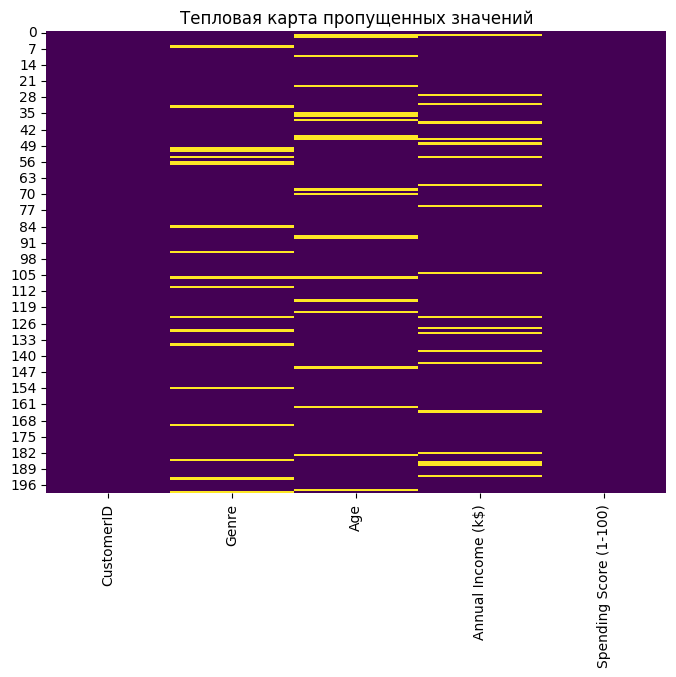

In [10]:
# Визуализация пропущенных значений (тепловая карта)
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений')
plt.show()

##### Исследуем данные по колонкам:

In [11]:
# Удаляем столбец CustomerID поскольку он для работы нам не нужен
df = df.drop('CustomerID', axis=1)

In [12]:
# Уникальные значения и их количество Genre
df['Genre'].value_counts()

Genre
Female     102
Male        77
Feemale      2
Name: count, dtype: int64

In [13]:
# Исправление опечатки внутри столбца Genre
df['Genre'] = df['Genre'].replace({'Feemale': 'Female'})  

# Проверяем изменения
df['Genre'].value_counts()

Genre
Female    104
Male       77
Name: count, dtype: int64

Название столбца 'Genre' исправлятся не будет, поскольку если изначально оно не было исправлено на этапе создания DF то скорее всего на это есть причины которые нам не известны, изменение столбца может повлиять на уже написаные программы или фильтры которые работают с данным названием.

In [14]:
# Уникальные значения и их количество Age
df['Age'].value_counts()

Age
32.0     10
35.0      8
31.0      7
30.0      7
49.0      7
19.0      6
40.0      6
47.0      6
23.0      6
27.0      6
36.0      5
38.0      5
48.0      5
20.0      4
59.0      4
18.0      4
34.0      4
29.0      4
54.0      4
37.0      3
60.0      3
43.0      3
67.0      3
25.0      3
39.0      3
50.0      3
46.0      3
33.0      3
28.0      3
22.0      3
24.0      3
45.0      3
21.0      3
68.0      3
44.0      2
57.0      2
26.0      2
51.0      2
52.0      2
135.0     2
58.0      2
65.0      2
53.0      2
41.0      2
63.0      1
70.0      1
69.0      1
55.0      1
66.0      1
56.0      1
42.0      1
Name: count, dtype: int64

In [15]:
# Уникальные значения и их количество
df['Annual Income (k$)'].value_counts()

Annual Income (k$)
54.0     11
78.0     11
63.0      6
60.0      6
87.0      6
         ..
37.0      1
113.0     1
69.0      1
76.0      1
15.0      1
Name: count, Length: 64, dtype: int64

In [16]:
# Уникальные значения и их количество
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

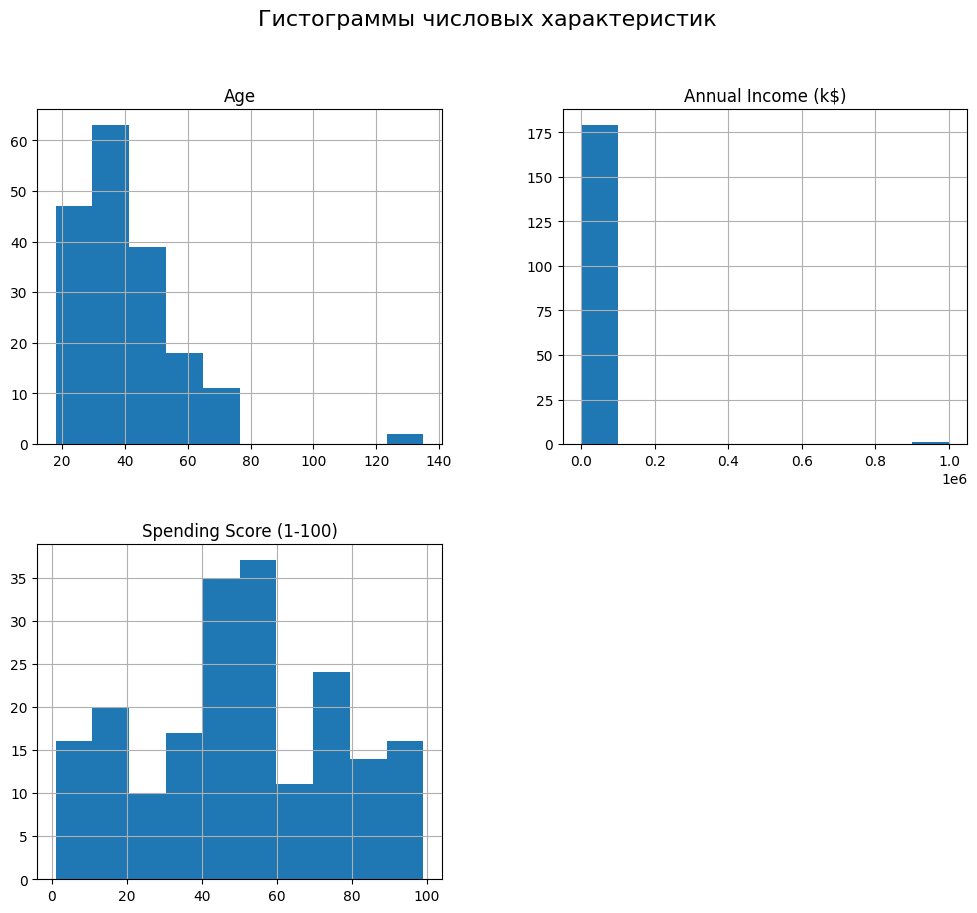

In [17]:
# Гистограммы числовых характеристик
df.hist(figsize=(12, 10))
plt.suptitle("Гистограммы числовых характеристик", fontsize=16)
plt.show()


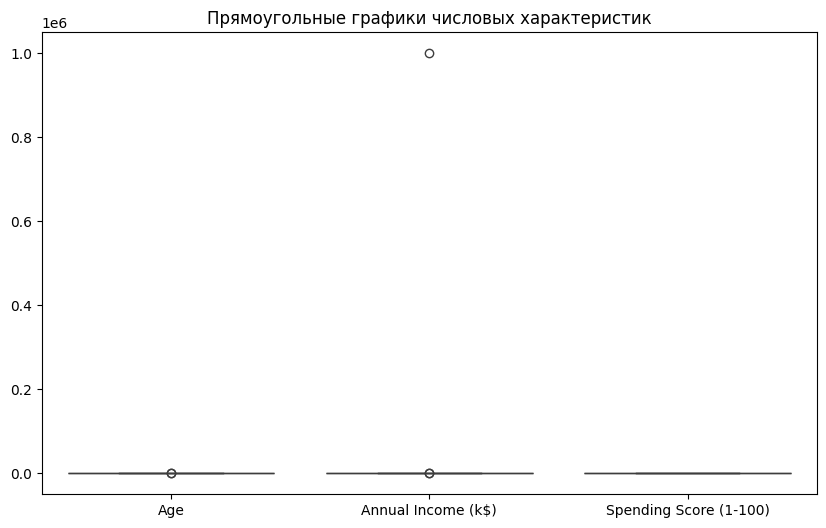

In [18]:
# Прямоугольные графики для визуализации распределений и потенциальных выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Прямоугольные графики числовых характеристик")
plt.show()

В колонках Age и Annual Income (k$) наблюдаются выбросы.

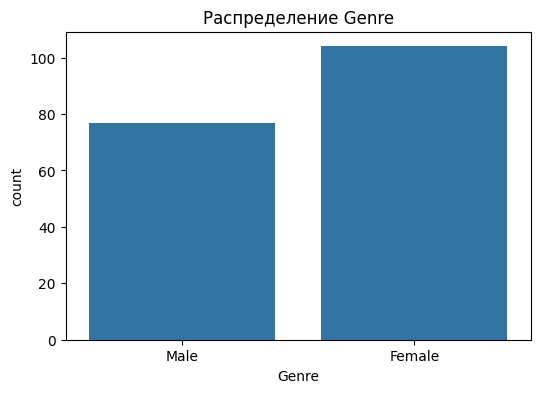

In [19]:
# Проверка баланса категириональных признаков
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=df)
plt.title("Распределение Genre")
plt.show()

Можем наблюдать что сильный дисбаланс между классами отсуствует.

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [20]:
# Определение независимых и зависимых переменных
X = df.drop(["Spending Score (1-100)"], axis=1) # Независимые переменные
y = df['Spending Score (1-100)']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (160, 3)
Размер тестового набора: (40, 3)


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [25]:
# Заполнение пропусков в 'Genre' с использованием моды
genre_median = SimpleImputer(strategy='most_frequent')
X_train['Genre'] = genre_median.fit_transform(X_train['Genre'].values.reshape(-1, 1)).ravel()

# Заполнение пропусков в 'Age' и 'Annual Income (k$)' с использованием медианы
other_median = SimpleImputer(strategy='median')
X_train[['Age', 'Annual Income (k$)']] = other_median.fit_transform(X_train[['Age', 'Annual Income (k$)']])

# Проверка результата
print(X_train.isnull().sum())

Genre                 0
Age                   0
Annual Income (k$)    0
dtype: int64


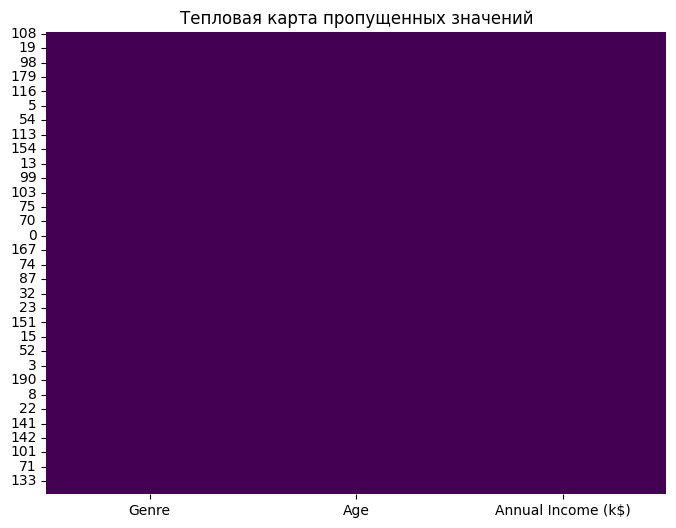

In [26]:
# Визуализация пропущенных значений (тепловая карта)
plt.figure(figsize=(8, 6))
sns.heatmap(X_train.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений')
plt.show()

Genre - поскольку это категорианальный признак заполнение модой позволит сохранить наиболее часто врстречающееся значение.

Age и Anual Income (k$) - Средние значние может быть чувствительно к выбросам которые наблюдаются в обоих колонках, по этому лучше использовать медиану, которая более устойчива к аномалиям.

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [25]:
### YOUR CODE HERE ###


### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [26]:
### YOUR CODE HERE ###


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [27]:
### YOUR CODE HERE ###


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [28]:
### YOUR CODE HERE ###
